<a href="https://colab.research.google.com/github/shaon11579/DNN-fall-2021/blob/main/A5_cifar_10_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from keras.layers import Conv2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [3]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train/255
x_test = x_test/255

In [4]:
# The next three methods to visualize input/output of our model side-by-side
def hstackimgs(min, max, images):
    return np.hstack(images[i] for i in range(min, max))

def sqstackimgs(length, height, images):
    return np.vstack(hstackimgs(i*length, (i+1)*length, images) for i in range(height))

def sbscompare(images1, images2, length, height):
    A = sqstackimgs(length, height, images1)
    B = sqstackimgs(length, height, images2)
    C = np.ones((A.shape[0], 32, 3))
    return np.hstack((A, C, B))

In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())     # 32x32x32
model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))      # 16x16x32
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 16x16x32
model.add(BatchNormalization())     # 16x16x32
model.add(UpSampling2D())
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 32x32x32
model.add(BatchNormalization())
model.add(Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid'))   # 32x32x3

model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 up_sampling2d (UpSampling2D  (None, 32, 32, 32)       0

In [6]:
# We want to add different noise vectors for each epoch
num_epochs = 5
NOISE = 0.3     # Set to 0 for a regular (non-denoising...) autoencoder
for i in range(num_epochs):
    noise = np.random.normal(0, NOISE, x_train.shape)
    model.fit(x_train + noise, x_train, epochs=1, batch_size=100)

500/500 [==============================] - 4s 9ms/step - loss: 0.0061 - accuracy: 0.6933


In [7]:
x_test = x_test[:400]
noise = np.random.normal(0, NOISE, x_test.shape)
pred_imgs = model.predict(x_test + noise)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


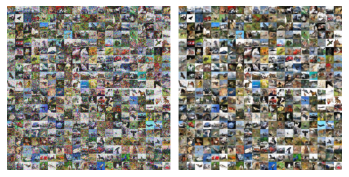

In [8]:
plt.imshow(sbscompare(x_test + noise, pred_imgs, 20, 20))
plt.axis('off')
plt.rcParams["figure.figsize"] = [60,60]
plt.show()

https://github.com/rtflynn/Cifar-Autoencoder

https://www.kaggle.com/tarunkr/autoencoder-denoising-image-mnist-cifar10

https://www.kaggle.com/mahtabshaan/autoencoder-as-feature-extractor-cifar10

cifar10: https://github.com/chaitanya100100/VAE-for-Image-Generation/blob/master/src/cifar10_train.py 


https://github.com/chaitanya100100/VAE-for-Image-Generation/blob/master/src/cifar10_generate.py

https://github.com/chaitanya100100/VAE-for-Image-Generation 


https://github.com/david-nagy/tensorflow-dl-tutorial/blob/master/3-Generative_Models/solutions/VAE.ipynb

https://docs.seldon.io/projects/alibi-detect/en/stable/examples/od_vae_cifar10.html

DCgan with cifar10: https://github.com/mafda/generative_adversarial_networks_101/blob/master/src/cifar10/02_DCGAN_CIFAR10.ipynb